# LSTM  para predecir a los pasajeros de las aerolíneas internacionales

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional 
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# convertimos un array de valores en una matriz de conjuntos de datos
Con esto tenemos la salida a n muestras siguientes

In [2]:
# convertimos un array de valores en una matriz de conjuntos de datos
def crear_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Se define una semilla constante para controlar la estabilidad del modelo.
Con esto se garantiza que el modelo se entrene siempre con la misma secuencia de numeros aleatorios.

In [3]:
numpy.random.seed(5)

# cargamos el conjunto de datos

(4559, 1)

(4559, 1)

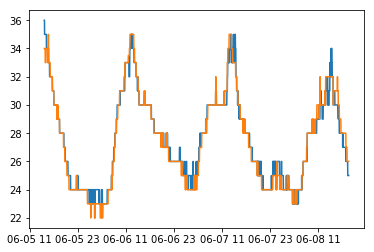

In [4]:
datos = pd.read_csv('ajustado.csv', parse_dates=True,index_col=0)
d_prueba = pd.read_csv('nodo3_periodo3.csv', parse_dates=True,index_col=0)
d_prueba = d_prueba.drop(columns=['HORA'])
data = pd.DataFrame(datos.loc[:,'TEMPERATURA'])
probar = pd.DataFrame(d_prueba.loc[:,'TEMPERATURA'])
#data = data.astype('float32')
display(data.shape,probar.shape)
plt.plot(probar)
plt.plot(data)

In [5]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
probar = scaler.fit_transform(probar)

In [6]:
# dividimos entre entranmiento y test
ld = len(data)
entrenar = data[0:int(ld * 0.7)]
validar = data[int(ld * 0.7)::]

# Se crean secuencias de observaciones pasadas para  los conjuntos de entrenamiento, validación y prueba
- El modelo aprenderá a hacer predicciones basado en la cantidad de secuencias que se definan.

In [50]:
# remodelamos X=t y Y=t+1
ventana = 30
entrenarX, entrenarY = crear_dataset(entrenar, ventana)
validarX, validarY = crear_dataset(validar, ventana)
probarX, probarY = crear_dataset(probar, ventana)

In [51]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
# Se reordena data.shape[0], data.shape[1], de manera que cada secuencia predice el siguiente paso de tiempo 
entrenarX = numpy.reshape(entrenarX, (entrenarX.shape[0], entrenarX.shape[1],1))
validarX = numpy.reshape(validarX, (validarX.shape[0], validarX.shape[1],1))
probarX = numpy.reshape(probarX, (probarX.shape[0], probarX.shape[1],1))
validarX.shape

(1337, 30, 1)

In [52]:
#creamos la LSTM network
# Se define el batch_size tamaño de muestras
batch_size = 1
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
# stateful = True permite que la red entrene con todos los lotes de manera secuencial y no por separado.
# se ingresa el tamaño de muestras de entrada.
#model.add(Bidirectional(LSTM(50, batch_input_shape=(batch_size, ventana),stateful = True)))
model.add(LSTM(4, batch_input_shape=(batch_size, ventana, 1), stateful=True))
# devuelve una secuencia de vectores de dimensión 50
model.add(Dense(1))
# evaluar la exactitud de las predicciones de un modelo a través del error de la raíz cuadrada de la media (RMSE)
# El error de entrenamiento mide qué tan bien ajusta los datos de entrenamiento tu modelo
#El error cuadrático medio (MSE) puede ser difícil de interpretar; es por esto que generalmente observamos el error 
# de la raíz cuadrada de la media (RMSE) en su lugar. Una propiedad interesante del RMSE es que se puede interpretar 
# en la misma escala que los objetivos originales
model.compile(loss='mean_squared_error', optimizer='adam')

# el bucle de ajuste permite que la red mantenga las salidas de las secuencias en cada iteración.
for i in range(100):
    model.fit(entrenarX, entrenarY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
 - 29s - loss: 0.0070
Epoch 1/1
 - 36s - loss: 8.1681e-04
Epoch 1/1
 - 34s - loss: 9.4440e-04
Epoch 1/1
 - 34s - loss: 0.0010
Epoch 1/1
 - 33s - loss: 0.0010
Epoch 1/1
 - 32s - loss: 9.9310e-04
Epoch 1/1
 - 35s - loss: 9.0822e-04
Epoch 1/1
 - 33s - loss: 8.3117e-04
Epoch 1/1
 - 35s - loss: 7.7730e-04
Epoch 1/1
 - 36s - loss: 7.3443e-04
Epoch 1/1
 - 33s - loss: 6.8180e-04
Epoch 1/1
 - 36s - loss: 6.2904e-04
Epoch 1/1
 - 35s - loss: 5.7271e-04
Epoch 1/1
 - 36s - loss: 5.1307e-04
Epoch 1/1
 - 34s - loss: 4.6100e-04
Epoch 1/1
 - 34s - loss: 4.1960e-04
Epoch 1/1
 - 34s - loss: 3.9007e-04
Epoch 1/1
 - 35s - loss: 3.6771e-04
Epoch 1/1
 - 38s - loss: 3.4952e-04
Epoch 1/1
 - 43s - loss: 3.4024e-04
Epoch 1/1
 - 40s - loss: 3.2298e-04
Epoch 1/1
 - 36s - loss: 3.1667e-04
Epoch 1/1
 - 32s - loss: 3.0064e-04
Epoch 1/1
 - 36s - loss: 2.9262e-04
Epoch 1/1
 - 35s - loss: 2.8504e-04
Epoch 1/1
 - 37s - loss: 2.8262e-04
Epoch 1/1
 - 38s - loss: 2.7599e-04
Epoch 1/1
 - 49s - loss: 2.7447e-04
Epoc

In [53]:
# hacemos las predicciones
entrenar_predic = model.predict(entrenarX, batch_size=batch_size)
validar_predic = model.predict(validarX, batch_size=batch_size)
probar_predic = model.predict(probarX, batch_size=batch_size)

In [54]:
# invertimos las predicciones
entrenar_predic = scaler.inverse_transform(entrenar_predic)
entrenarY = scaler.inverse_transform([entrenarY])
validar_predic = scaler.inverse_transform(validar_predic)
validarY = scaler.inverse_transform([validarY])
probar_predic = scaler.inverse_transform(probar_predic)
probarY = scaler.inverse_transform([probarY])

In [55]:
# calculamos el error rms
r_entrenamiento = math.sqrt(mean_squared_error(entrenarY[0], entrenar_predic[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (r_entrenamiento))
r_validacion = math.sqrt(mean_squared_error(validarY[0], validar_predic[:,0]))
print('Resultado de la validación: %.2f RMSE' % (r_validacion))
r_prueba = math.sqrt(mean_squared_error(probarY[0], probar_predic[:,0]))
print('Resultado de la prueba: %.2f RMSE' % (r_prueba))

Resultado del entrenamiento: 2.17 RMSE
Resultado de la validación: 1.61 RMSE
Resultado de la prueba: 28.06 RMSE


In [56]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[ventana:len(entrenar_predic)+ventana, :] = entrenar_predic

In [57]:
# predicciones del test de cambio para plotear
vPredictPlot = numpy.empty_like(data)
vPredictPlot[:, :] = numpy.nan
vPredictPlot[len(entrenar_predic)+(ventana*2)+1:len(data)-1, :] = validar_predic

In [58]:
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(d_prueba)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[ventana:len(probar_predic)+ventana, :] = probar_predic

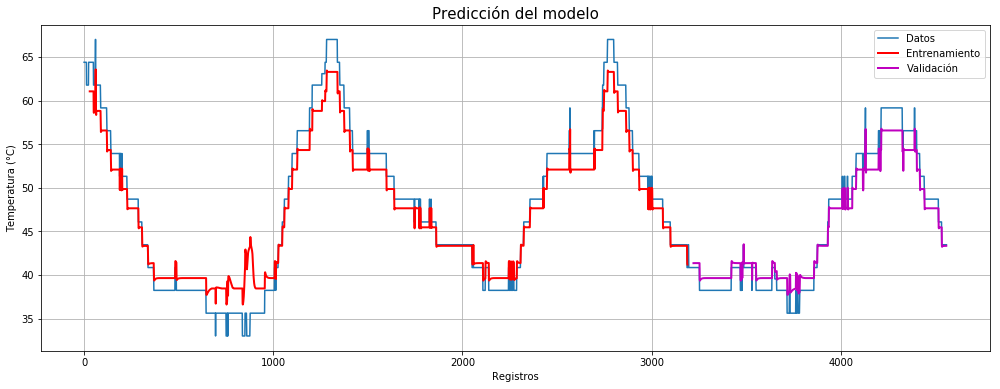

In [62]:
plt.figure(figsize=(17,6))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(vPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Entrenamiento', 'Validación'))
plt.grid(True)
plt.title("Predicción del modelo", fontsize = 15)
plt.xlabel("Registros", fontsize = 10)
plt.ylabel("Temperatura (°C)", fontsize = 10)
plt.show()

Resultado de la prueba: 7.20 RMSE


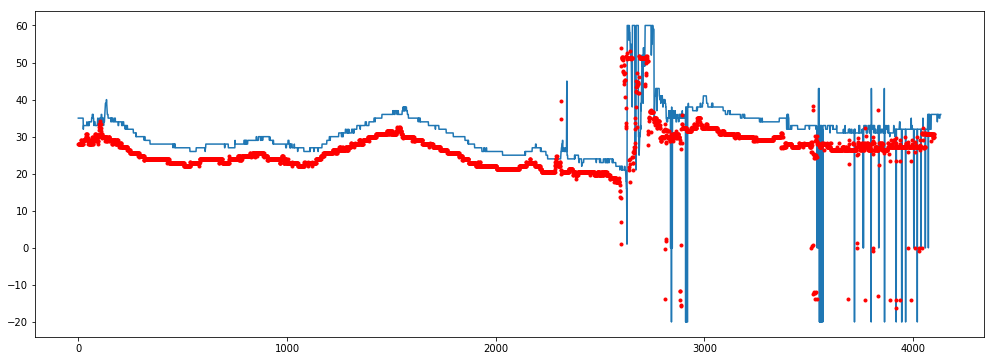

In [72]:
d_prueba = pd.read_csv('nodo2_periodo2.csv', parse_dates=True,index_col=0)
d_prueba = d_prueba.drop(columns=['HORA'])
probar = pd.DataFrame(d_prueba.loc[:,'TEMPERATURA'])
plt.figure(figsize=(17,6))
# normalizamos el conjunto de datos

scaler = MinMaxScaler(feature_range=(0, 1))
probar_e = pd.DataFrame(scaler.fit_transform(probar)).values
probarX, probarY = crear_dataset(probar_e, ventana)

probarX = numpy.reshape(probarX, (probarX.shape[0], probarX.shape[1], 1))
probar_predic = model.predict(probarX, batch_size=batch_size)

probar_predic = scaler.inverse_transform(probar_predic)
probarY = scaler.inverse_transform([probarY])

r_prueba = math.sqrt(mean_squared_error(probarY[0], probar_predic[:,0]))
print('Resultado de la prueba: %.2f RMSE' % (r_prueba))
testPredictPlot = numpy.empty_like(probar)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[ventana:len(probar_predic)+ventana, :] = probar_predic
plt.plot(probar.values)
plt.plot(probar_predic,'r.')

#valores = pd.DataFrame({'t':datos.iloc[58:64,-1]})
valores = pd.DataFrame({'t':[33,33,33,33,33,33,\
                             33,33,33,33,33,33,33,33,33,33,33,33,\
                             33,33,33,33,34,34,34,34,34,34,34,67,34,34]})
inte = [[x] for x in valores.t]
print(inte)
probar = pd.DataFrame(scaler.fit_transform(inte)).values
probarX, probarY = crear_dataset(probar, ventana)

probarX = numpy.reshape(probarX, (probarX.shape[0], probarX.shape[1], 1))
probar_predic = model.predict(probarX, batch_size=batch_size)
probar_predic = scaler.inverse_transform(probar_predic)
r = pd.DataFrame({'t+%d'%ventana:[int(x) for x in probar_predic]})
pd.concat([valores,r],axis=1)


In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (1, 4)                    96        
_________________________________________________________________
dense_11 (Dense)             (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
